# Data Visualization

## Contents

* [Introduction](#Introduction)
* [Matplotlib](#Matplotlib)
* [Seaborn](#Seaborn)
* [Plotly](#Plotly)
* [Pandas Profiling](#Pandas-Profiling)

## Introduction

Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.

Data visualization is a key step in the data science process. It allows data scientists to see the connections between the data they have and the conclusions they can draw from it. Data visualization is also a key part of data storytelling, which is a way to communicate findings to non-technical stakeholders.

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [ ]:
while True:
    try:
        import matplotlib.pyplot as plt
        import pandas as pd
        import seaborn as sns
        import plotly.express as px
        import plotly.graph_objects as go
        import pandas_profiling as pp
        break
    except ModuleNotFoundError:
        %pip install matplotlib pandas seaborn plotly pandas_profiling

## Example with Titanic dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', encoding='utf-8')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 12)

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a Python library for creating static, animated, and interactive visualizations. It can be used in Python scripts, the Python and IPython shells, the Jupyter Notebook, web application servers, and four graphical user interface toolkits.

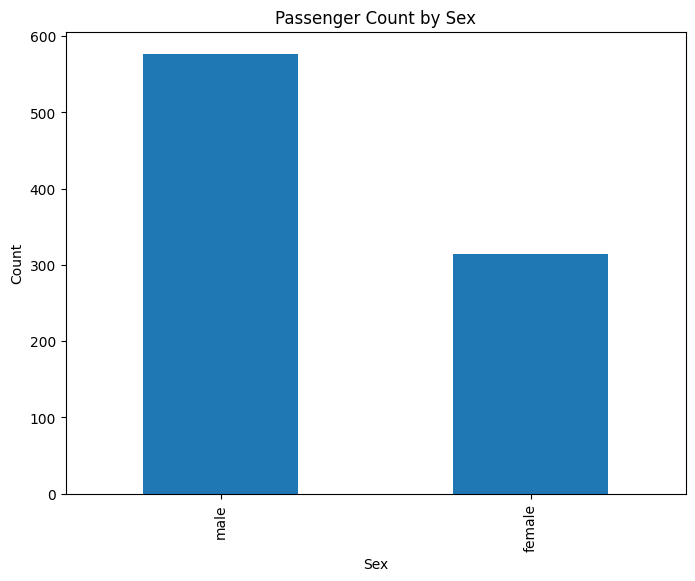

In [11]:
plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Count by Sex')
plt.show()

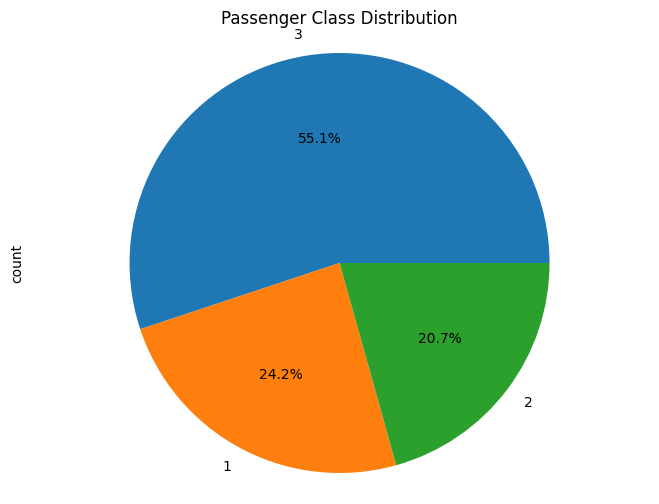

In [12]:
plt.figure(figsize=(8, 6))
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Passenger Class Distribution')
plt.show()

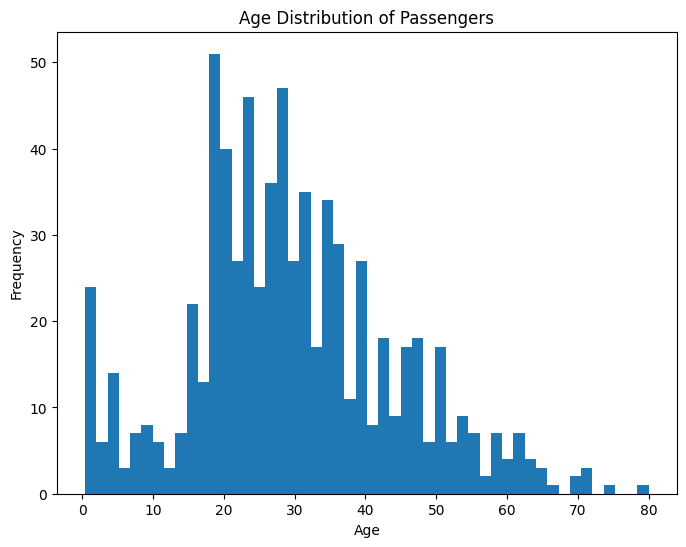

In [17]:
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='hist', bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.show()

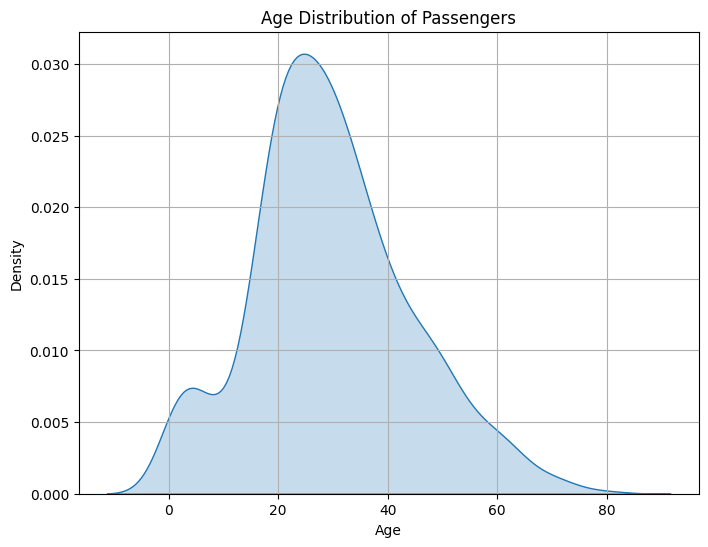

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Passengers')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

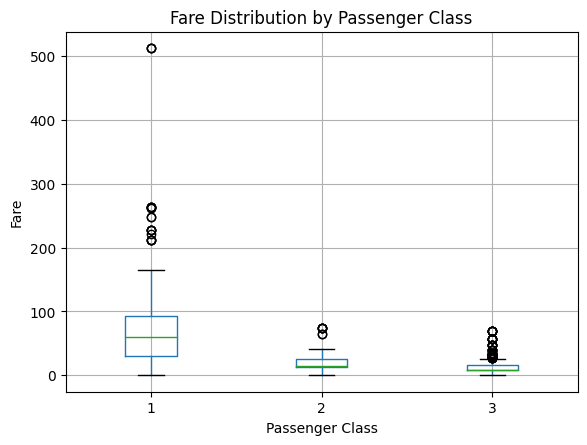

In [14]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Fare', by='Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.suptitle('')  # Remove default title
plt.show()

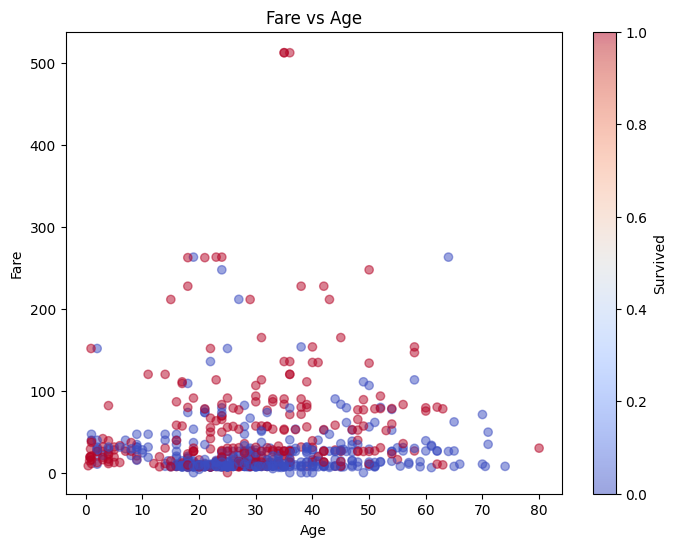

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age')
plt.show()

C:\Users\Matte\AppData\Local\Temp\ipykernel_8712\3430397892.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


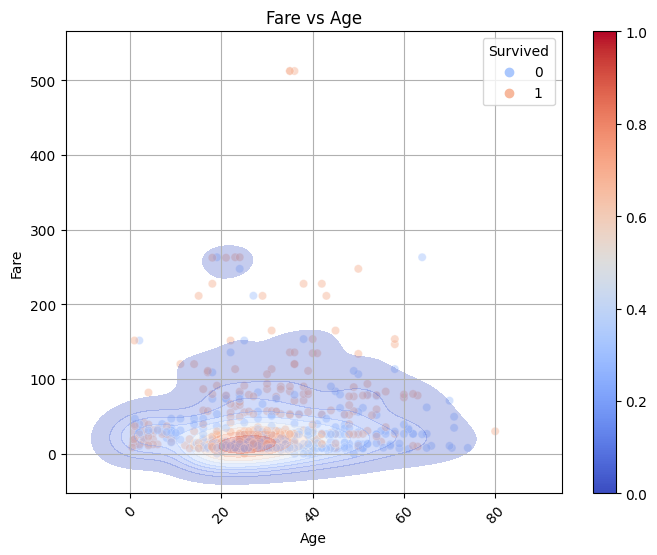

In [31]:
# Scatter plot with KDE - Fare vs Age
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.5)
sns.kdeplot(data=df, x='Age', y='Fare', fill=True, cmap='coolwarm', alpha=0.3)

# Create a separate ScalarMappable for colorbar
cmap = plt.cm.coolwarm
norm = plt.Normalize(df['Survived'].min(), df['Survived'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add colorbar using the ScalarMappable
plt.colorbar(sm)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

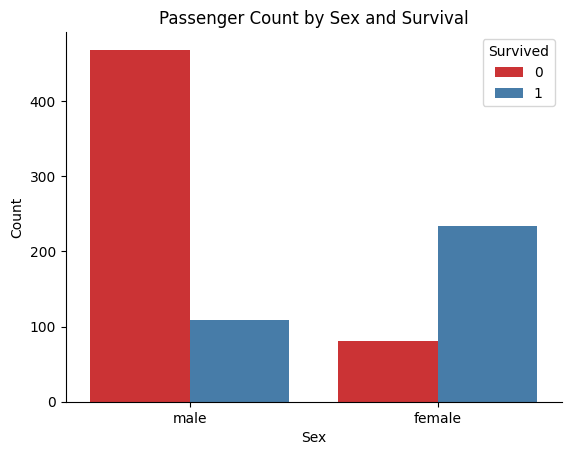

In [33]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
sns.despine()  # Remove the top and right spines
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Count by Sex and Survival')
plt.show()

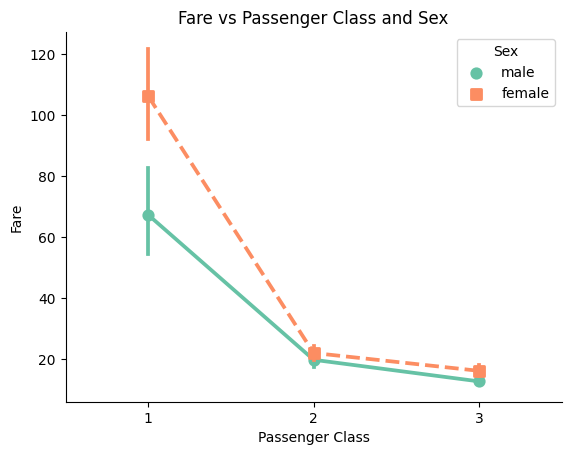

In [34]:
sns.pointplot(data=df, x='Pclass', y='Fare', hue='Sex', linestyles=['-', '--'], markers=['o', 's'], palette='Set2')
sns.despine()
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare vs Passenger Class and Sex')
plt.show()


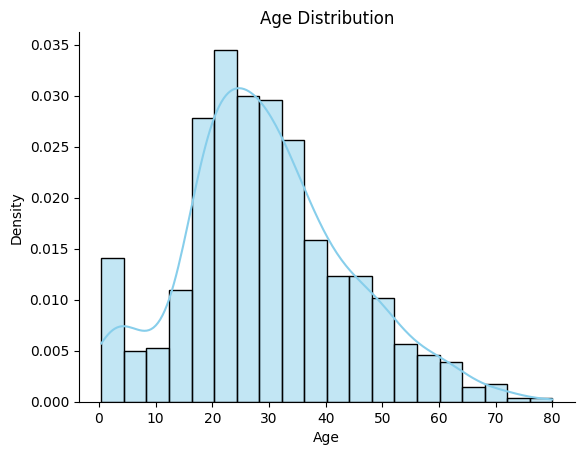

In [35]:
sns.histplot(data=df, x='Age', kde=True, bins=20, stat='density', color='skyblue')
sns.despine()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

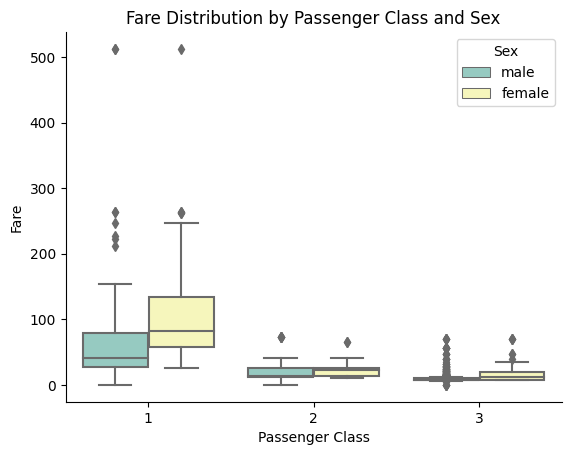

In [36]:
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Sex', palette='Set3')
sns.despine()
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class and Sex')
plt.show()

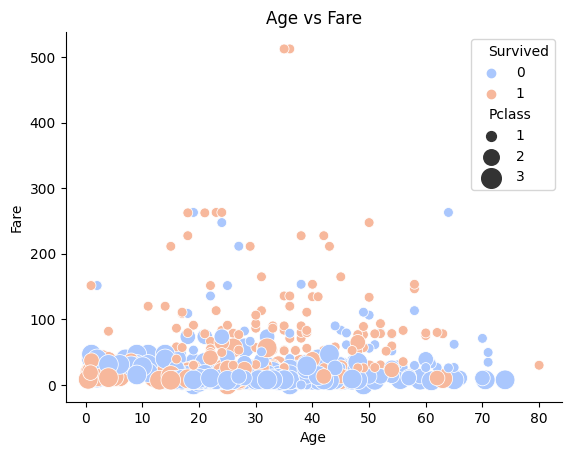

In [37]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='Pclass', sizes=(50, 200), palette='coolwarm')
sns.despine()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

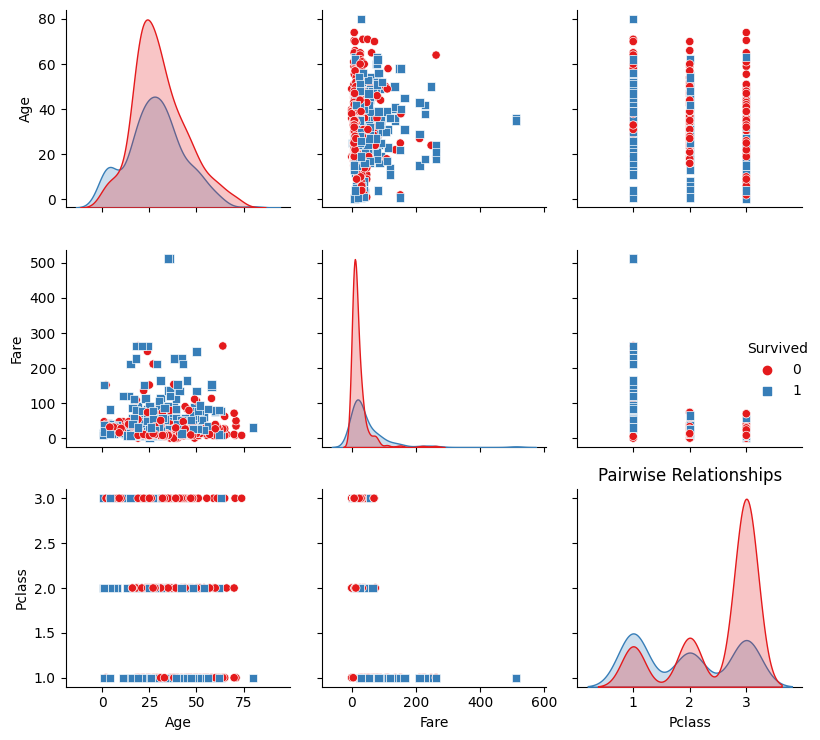

In [41]:
sns.pairplot(data=df, hue='Survived', vars=['Age', 'Fare', 'Pclass'], markers=['o', 's'], palette='Set1')
plt.title('Pairwise Relationships')
plt.tight_layout()
plt.show()

# Plotly

[Plotly](https://plotly.com/python/) is a Python graphing library that makes interactive, publication-quality graphs online. It provides a high-level interface for drawing attractive and informative statistical graphics. While Seaborn, Pandas and Matplotlib are static visualization libraries, Plotly is an interactive visualization library powered by JavaScript. There are a unique set of tools to help you build interactive visualizations and make dashboards.

> Note: Plotly is not rendered in GitHub. To see the interactive plots, you need to run the notebook locally or open it in Google Colab.

In [42]:
bar_fig = px.histogram(df, x='Sex', color='Survived', barmode='group')
bar_fig.update_layout(title='Passenger Count by Sex and Survival')
bar_fig.show()

In [43]:
point_fig = px.strip(df, x='Pclass', y='Fare', color='Sex', facet_col='Sex', facet_row='Survived')
point_fig.update_layout(title='Fare vs Passenger Class and Sex')
point_fig.show()

In [44]:
hist_fig = px.histogram(df, x='Age', nbins=20, marginal='rug', color_discrete_sequence=['skyblue'])
hist_fig.update_layout(title='Age Distribution')
hist_fig.show()

In [45]:
box_fig = px.box(df, x='Pclass', y='Fare', color='Sex')
box_fig.update_layout(title='Fare Distribution by Passenger Class and Sex')
box_fig.show()

In [48]:
scatter_fig = px.scatter(df, x='Age', y='Fare', color='Survived', size='Pclass', hover_data=['Sex'], title='Age vs Fare')
scatter_fig.show()

In [49]:
pair_fig = px.scatter_matrix(df, dimensions=['Age', 'Fare', 'Pclass'], color='Survived', title='Pairwise Relationships')
pair_fig.show()

#### Sunburst plot

In [50]:
sunburst_fig = px.sunburst(df, path=['Pclass', 'Sex', 'Survived'], color='Survived')
sunburst_fig.update_layout(title='Passenger Class, Sex, and Survival')
sunburst_fig.show()

> **Note:** Click on the image to open the interactive plot.

#### Donut chart

In [51]:
donut_fig = px.pie(df, names='Sex', hole=0.4)
donut_fig.update_layout(title='Proportion of Passengers by Sex')
donut_fig.show()


#### Violin plot

In [52]:
violin_fig = px.violin(df, y='Age', x='Pclass', color='Survived', box=True, points='all')
violin_fig.update_layout(title='Age Distribution by Passenger Class and Survival')
violin_fig.show()

#### Ternary plot

In [54]:
ternary_fig = px.scatter_ternary(df, a='Fare', b='Age', c='Pclass', color='Survived',
                                 color_continuous_scale='Viridis', hover_data=['Sex'])
ternary_fig.update_layout(title='Ternary Plot: Fare, Age, and Passenger Class')
ternary_fig.show()

#### 3D scatter plot

In [58]:
scatter3d_fig = px.scatter_3d(df, x='Age', y='Fare', z='Pclass', color='Survived', symbol='Sex',
                              opacity=0.7, size_max=8)
scatter3d_fig.update_layout(title='3D Scatter Plot: Age, Fare, and Passenger Class',
                            scene=dict(
                                xaxis_title='Age',
                                yaxis_title='Fare',
                                zaxis_title='Passenger Class'
                            ))
scatter3d_fig.show()

# Pandas Profiling

[Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/) is a Python library that generates interactive HTML reports from pandas DataFrame objects. The Pandas Profiling report is a great first step in the exploratory data analysis process. For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report

> Note: Pandas Profiling is not rendered in GitHub. To see the interactive plots, you need to run the notebook locally or open it in Google Colab. You can also see the report in the [HTML file](titanic_dataset_report.html) generated from the notebook.

In [63]:
profile = pp.ProfileReport(df)

In [64]:
profile.to_notebook_iframe()
profile.to_file("titanic_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---

# What's next?

Next notebook: [Regression](https://github.com/vrughetti/python4DS/blob/main/notebooks/regression/regression.ipynb)